## Classification on data set March_2024_AF2_01.txt. The target attribute is structure name.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("March_2024_AF2_01.txt", sep=r"\s+", header=None)
df.columns = ['Protein_number', 'res_number', 'PB1', 'PB2', 'AA1', 'AA2', 'S2_1', 'S2_2', 'expected_frequency', 'plDDT', 'RSA1', 'RSA2']
df

,Protein_number,res_number,PB1,PB2,AA1,AA2,S2_1,S2_2,expected_frequency,plDDT,RSA1,RSA2
0,0,7,j,j,G,G,C,S,0.880055,60.180000,100.000000,100.000000
1,1,95,n,l,E,Q,T,T,0.736402,96.220001,89.762611,98.582039
2,1,219,i,d,G,N,S,C,0.040571,31.870001,100.000000,100.000000
3,1,222,d,i,T,V,C,C,0.021758,47.259998,100.000000,100.000000
4,1,223,i,d,V,P,C,C,0.040571,38.200001,100.000000,93.366096
...,...,...,...,...,...,...,...,...,...,...,...,...
671150,23508,14909273,j,d,G,L,C,C,0.623739,95.459999,1.531394,20.793951
671151,23508,14909291,f,d,C,D,P,S,0.047665,95.379997,11.473963,100.000000
671152,23508,14909390,j,d,G,P,S,P,0.623739,80.699997,65.849922,88.452087
671153,23508,14909434,g,f,L,T,C,C,0.430306,79.760002,60.491493,46.452702


In [5]:
def concat_structures(data, rm_columns : list, req_col_str : str):
    """
    Input:
        - data: DataFrame to be processed (a copy is used to avoid modifying the original).
        - rm_columns: List of column names (strings) to be removed.
        - req_col_str: String of a new column name with "-" indicating concatenation.
    Output:
        - A modified copy of the DataFrame with the requested changes.
    """
    data = data.copy()
    data = data.drop(list(('Protein_number', 'res_number')), axis=1)
    data[req_col_str] = ""
    for req_col in req_col_str.split('-'):
        data[req_col_str] += data[req_col]
    data = data.drop(rm_columns, axis=1)
    return data

In [6]:
df1 = concat_structures(df, list(('AA1', 'AA2')), 'AA1-AA2')
df1

,PB1,PB2,S2_1,S2_2,expected_frequency,plDDT,RSA1,RSA2,AA1-AA2
0,j,j,C,S,0.880055,60.180000,100.000000,100.000000,GG
1,n,l,T,T,0.736402,96.220001,89.762611,98.582039,EQ
2,i,d,S,C,0.040571,31.870001,100.000000,100.000000,GN
3,d,i,C,C,0.021758,47.259998,100.000000,100.000000,TV
4,i,d,C,C,0.040571,38.200001,100.000000,93.366096,VP
...,...,...,...,...,...,...,...,...,...
671150,j,d,C,C,0.623739,95.459999,1.531394,20.793951,GL
671151,f,d,P,S,0.047665,95.379997,11.473963,100.000000,CD
671152,j,d,S,P,0.623739,80.699997,65.849922,88.452087,GP
671153,g,f,C,C,0.430306,79.760002,60.491493,46.452702,LT


In [7]:
df2 = concat_structures(df, list(('PB1', 'PB2')), 'PB1-PB2')
df2

,AA1,AA2,S2_1,S2_2,expected_frequency,plDDT,RSA1,RSA2,PB1-PB2
0,G,G,C,S,0.880055,60.180000,100.000000,100.000000,jj
1,E,Q,T,T,0.736402,96.220001,89.762611,98.582039,nl
2,G,N,S,C,0.040571,31.870001,100.000000,100.000000,id
3,T,V,C,C,0.021758,47.259998,100.000000,100.000000,di
4,V,P,C,C,0.040571,38.200001,100.000000,93.366096,id
...,...,...,...,...,...,...,...,...,...
671150,G,L,C,C,0.623739,95.459999,1.531394,20.793951,jd
671151,C,D,P,S,0.047665,95.379997,11.473963,100.000000,fd
671152,G,P,S,P,0.623739,80.699997,65.849922,88.452087,jd
671153,L,T,C,C,0.430306,79.760002,60.491493,46.452702,gf


In [8]:
df3 = concat_structures(df, list(('S2_1', 'S2_2')), 'S2_1-S2_2')
df3

,PB1,PB2,AA1,AA2,expected_frequency,plDDT,RSA1,RSA2,S2_1-S2_2
0,j,j,G,G,0.880055,60.180000,100.000000,100.000000,CS
1,n,l,E,Q,0.736402,96.220001,89.762611,98.582039,TT
2,i,d,G,N,0.040571,31.870001,100.000000,100.000000,SC
3,d,i,T,V,0.021758,47.259998,100.000000,100.000000,CC
4,i,d,V,P,0.040571,38.200001,100.000000,93.366096,CC
...,...,...,...,...,...,...,...,...,...
671150,j,d,G,L,0.623739,95.459999,1.531394,20.793951,CC
671151,f,d,C,D,0.047665,95.379997,11.473963,100.000000,PS
671152,j,d,G,P,0.623739,80.699997,65.849922,88.452087,SP
671153,g,f,L,T,0.430306,79.760002,60.491493,46.452702,CC


In [23]:
import matplotlib.pyplot as plt

def check_imbalance(target_attr):

    if target_attr.dtype != 'category':
        target_attr = target_attr.astype('category')

    category_counts = target_attr.value_counts().head(len(target_attr.unique()))

    plt.figure(figsize=(8, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(target_attr.name)
    plt.ylabel('Frequency')
    plt.title(f"Class Imbalance; The number of labels in the target attribute: {len(target_attr.unique())}")

    plt.xticks([])
    plt.tight_layout()
    plt.show()

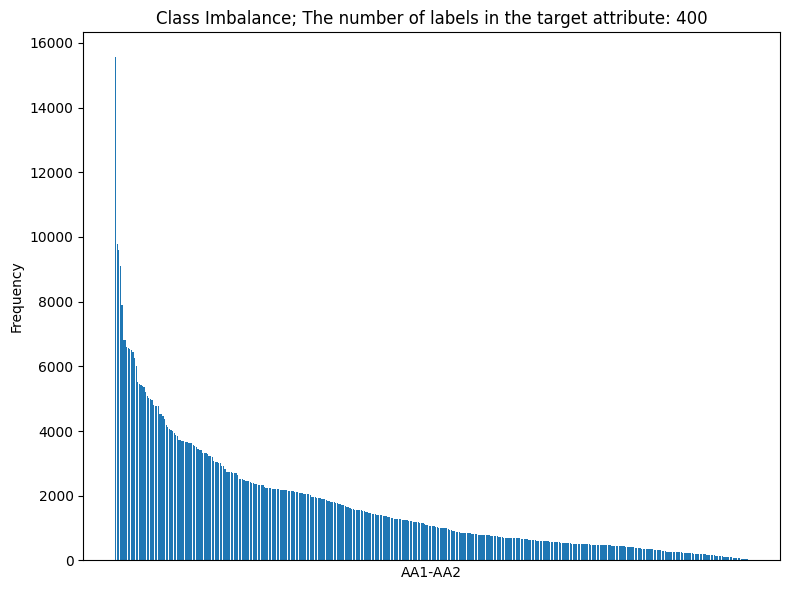

In [24]:
check_imbalance(df1['AA1-AA2'])

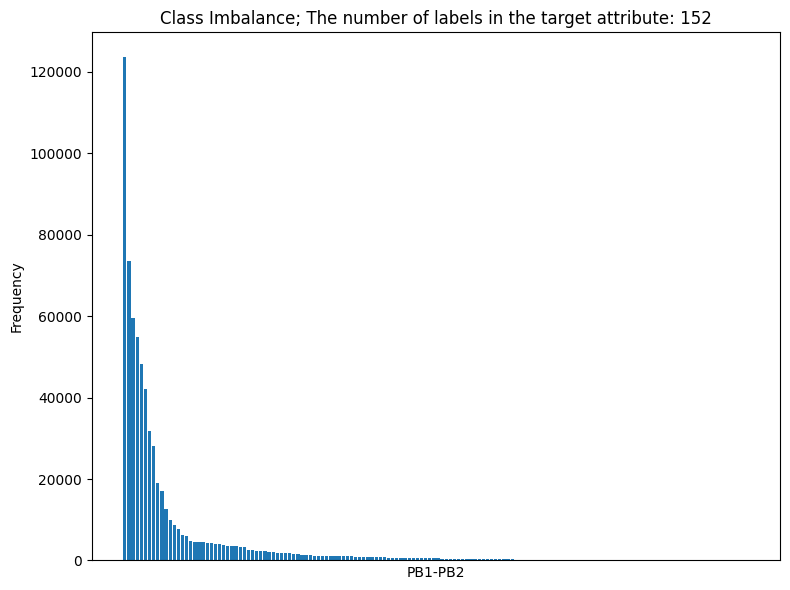

In [25]:
check_imbalance(df2['PB1-PB2'])

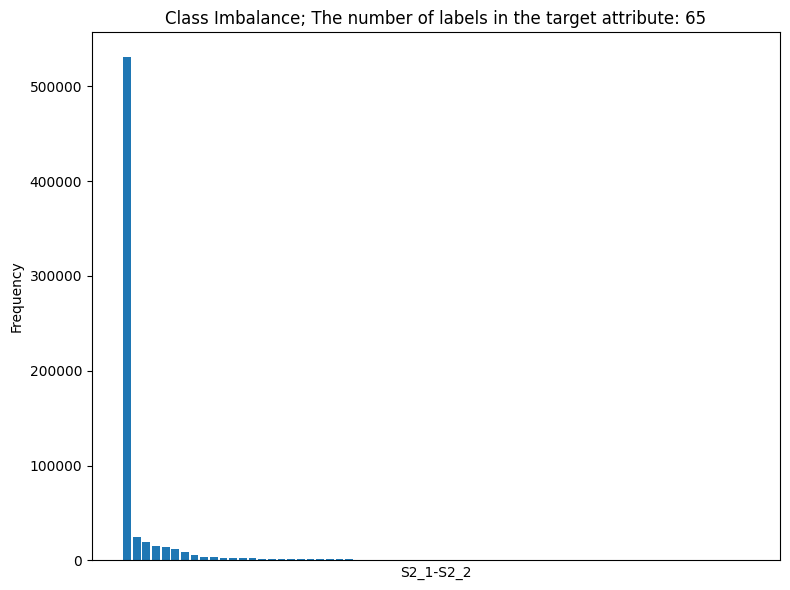

In [26]:
check_imbalance(df3['S2_1-S2_2'])

### We notice that in all three cases, one class is much more frequent than the others. Therefore, for some classifiers, it will be necessary to handle class imbalance. Since there are a large number of classes and one is more dominant, the best approach might be to apply techniques like under-sampling, over-sampling, or adjusting class weights to balance the classes.

# CatBoost

In [27]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [28]:
def train_test(data):
  target = data.columns[-1]
  features = data.columns[:-1]
  X = data[features]
  y = data[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
  return X_train, X_test, y_train, y_test

In [29]:
categorical_features_aa = ['PB1', 'PB2', 'S2_1', 'S2_2']

In [30]:
model1_cb = CatBoostClassifier(iterations=50, learning_rate=0.01, depth=8, task_type='GPU', cat_features=categorical_features_aa, auto_class_weights='Balanced', verbose=10)

In [31]:
X_train_aa, X_test_aa, y_train_aa, y_test_aa = train_test(df1)
print(X_train_aa.shape, X_test_aa.shape, y_train_aa.shape, y_test_aa.shape)

(402693, 8) (268462, 8) (402693,) (268462,)


In [ ]:
model1_cb.fit(X_train_aa, y_train_aa)

0:	learn: 5.9788555	total: 31.8s	remaining: 25m 57s
10:	learn: 5.8765125	total: 6m 5s	remaining: 21m 34s
20:	learn: 5.7997261	total: 11m 47s	remaining: 16m 17s
30:	learn: 5.7378945	total: 16m 43s	remaining: 10m 15s
40:	learn: 5.6857632	total: 21m 52s	remaining: 4m 48s
49:	learn: 5.6447112	total: 26m 36s	remaining: 0us


In [ ]:
y_pred_cb1 = model1_cb.predict(X_test_aa)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classification_report(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
  recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
  f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

  metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
  }

  metrics_df = pd.DataFrame(metrics)
  print(metrics_df.to_markdown(index=False))

In [ ]:
classification_report(y_test_aa, y_pred_cb1)

| Metric    |     Score |
|:----------|----------:|
| Accuracy  | 0.0222564 |
| Precision | 0.635716  |
| Recall    | 0.0222564 |
| F1 Score  | 0.0100246 |


In [32]:
categorical_features_pb = ['AA1', 'AA2', 'S2_1', 'S2_2']

In [33]:
model2_cb = CatBoostClassifier(iterations=100, learning_rate=0.01, depth=8, task_type='GPU', cat_features=categorical_features_pb, auto_class_weights='Balanced', verbose=20)

In [34]:
X_train_pb, X_test_pb, y_train_pb, y_test_pb = train_test(df2)
print(X_train_pb.shape, X_test_pb.shape, y_train_pb.shape, y_test_pb.shape)

(402693, 8) (268462, 8) (402693,) (268462,)


In [ ]:
model2_cb.fit(X_train_pb, y_train_pb)

0:	learn: 4.8837519	total: 3.79s	remaining: 6m 15s
20:	learn: 3.8856503	total: 1m 11s	remaining: 4m 28s
40:	learn: 3.3522411	total: 2m 18s	remaining: 3m 19s
60:	learn: 2.9575900	total: 3m 25s	remaining: 2m 11s
80:	learn: 2.6624258	total: 4m 32s	remaining: 1m 3s
99:	learn: 2.4255008	total: 5m 35s	remaining: 0us


In [ ]:
y_pred_cb2 = model2_cb.predict(X_test_pb)

In [ ]:
classification_report(y_test_pb, y_pred_cb2)

| Metric    |    Score |
|:----------|---------:|
| Accuracy  | 0.938654 |
| Precision | 0.965507 |
| Recall    | 0.938654 |
| F1 Score  | 0.94718  |


In [35]:
categorical_features_s2 = ['PB1', 'PB2', 'AA1', 'AA2']

In [36]:
model3_cb = CatBoostClassifier(iterations=150, learning_rate=0.01, depth=8, task_type='GPU', cat_features=categorical_features_s2, auto_class_weights='Balanced', verbose=30)

In [37]:
X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test(df3)
print(X_train_pb.shape, X_test_pb.shape, y_train_pb.shape, y_test_pb.shape)

(402693, 8) (268462, 8) (402693,) (268462,)


In [ ]:
model3_cb.fit(X_train_s2, y_train_s2)

0:	learn: 4.0715587	total: 689ms	remaining: 1m 42s
30:	learn: 2.8458155	total: 20.9s	remaining: 1m 20s
60:	learn: 2.4139523	total: 40.8s	remaining: 59.5s
90:	learn: 2.1661443	total: 1m 1s	remaining: 39.7s
120:	learn: 1.9941771	total: 1m 21s	remaining: 19.5s
149:	learn: 1.8575852	total: 1m 40s	remaining: 0us


In [ ]:
y_pred_cb3 = model3_cb.predict(X_test_s2)

In [ ]:
classification_report(y_test_s2, y_pred_cb3)

| Metric    |    Score |
|:----------|---------:|
| Accuracy  | 0.455033 |
| Precision | 0.852374 |
| Recall    | 0.455033 |
| F1 Score  | 0.580421 |


# RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor_aa = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_aa)
    ],
    remainder='passthrough'  # Keep numerical features as is
)

In [ ]:
X_train_aa_transformed = preprocessor_aa.fit_transform(X_train_aa)
X_test_aa_transformed = preprocessor_aa.transform(X_test_aa)

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
nm1 = NearMiss(version=1, n_neighbors=3)

In [ ]:
X_train_aa_resampled, y_train_aa_resampled = nm1.fit_resample(X_train_aa_transformed, y_train_aa)

In [ ]:
model1_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
model1_rf.fit(X_train_aa_resampled, y_train_aa_resampled)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred_rf1 = model1_rf.predict(X_test_aa_transformed)

In [ ]:
classification_report(y_test_aa, y_pred_rf1)

| Metric    |       Score |
|:----------|------------:|
| Accuracy  | 0.00164269  |
| Precision | 0.385529    |
| Recall    | 0.00164269  |
| F1 Score  | 0.000978446 |


In [ ]:
preprocessor_pb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_pb)
    ],
    remainder='passthrough'
)

In [ ]:
X_train_pb_transformed = preprocessor_pb.fit_transform(X_train_pb)
X_test_pb_transformed = preprocessor_pb.transform(X_test_pb)

In [ ]:
nm2 = NearMiss(version=1, n_neighbors=1)

In [ ]:
X_train_pb_resampled, y_train_pb_resampled = nm2.fit_resample(X_train_pb_transformed, y_train_pb)

In [ ]:
model2_rf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)

In [ ]:
model2_rf.fit(X_train_pb_resampled, y_train_pb_resampled)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [ ]:
y_pred_rf2 = model2_rf.predict(X_test_pb_transformed)

In [ ]:
classification_report(y_test_pb, y_pred_rf2)

| Metric    |     Score |
|:----------|----------:|
| Accuracy  | 0.0164418 |
| Precision | 0.180471  |
| Recall    | 0.0164418 |
| F1 Score  | 0.0240019 |


In [40]:
preprocessor_s2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_s2)
    ],
    remainder='passthrough'
)

In [41]:
X_train_s2_transformed = preprocessor_s2.fit_transform(X_train_s2)
X_test_s2_transformed = preprocessor_s2.transform(X_test_s2)

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto')
X_train_s2_resampled, y_train_s2_resampled = ros.fit_resample(X_train_s2_transformed, y_train_s2)

In [43]:
model3_rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

In [ ]:
model3_rf.fit(X_train_s2_resampled, y_train_s2_resampled)

In [ ]:
y_pred_rf3 = model3_rf.predict(X_test_s2_transformed)

In [ ]:
classification_report(y_test_s2, y_pred_rf3)

# Artificial Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical